In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
#0 = no, 1 = yes

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
#hypertension = high blood pressure

In [3]:
#I think we can skip
stroke_data.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
#Dropping id since useless
#Might drop marriage later (considering dropping since doesn't seem useful)
columns_to_drop = ['id']
stroke_data.drop(columns_to_drop, axis = 1, inplace = True)
stroke_data.head(50)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
stroke_data.dropna(axis = 0, how = 'any', inplace = True)

In [6]:
stroke_data.reset_index(drop = True, inplace = True)

In [7]:
#I'll skip this too
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#outlier conditions avg_glucose
#high = >= 168.32
#low = <=22.32
#change in cutting out outliers -> mean went from 105 to 91, std from 44 to 22

#outlier conditions bmi
#high = >=47.5
#low = <= 9.1
#change in cutting out outliers -> mean went from 28.31 to 27.81, std from 7.6 to 6.7

#age has no outliers

#Low outlier < q1 - 1.5(q3-q1)
#High outlier > q3 + 1.5(q3-q1)

In [9]:
stroke_data1 = stroke_data.loc[stroke_data['avg_glucose_level'] <= 168.32]
stroke_data = stroke_data1
stroke_data.reset_index(drop = True, inplace = True)
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4337,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4338,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4339,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4340,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
stroke_data2 = stroke_data.loc[stroke_data['bmi'] <= 47.5]
stroke_data = stroke_data2
stroke_data.reset_index(drop = True, inplace = True)
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4255,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4256,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4257,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4258,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000,4260.000000
mean,40.593070,0.068545,0.036385,91.515812,27.813028,0.031925
std,22.443644,0.252708,0.187268,22.715044,6.721922,0.175821
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,22.000000,0.000000,0.000000,75.060000,23.000000,0.000000
50%,41.000000,0.000000,0.000000,88.055000,27.400000,0.000000
75%,58.000000,0.000000,0.000000,104.055000,32.100000,0.000000
max,82.000000,1.000000,1.000000,168.150000,47.500000,1.000000


In [12]:
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4255,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4256,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4257,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4258,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
#Building box plots!! :D
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
3,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


<Figure size 720x720 with 0 Axes>

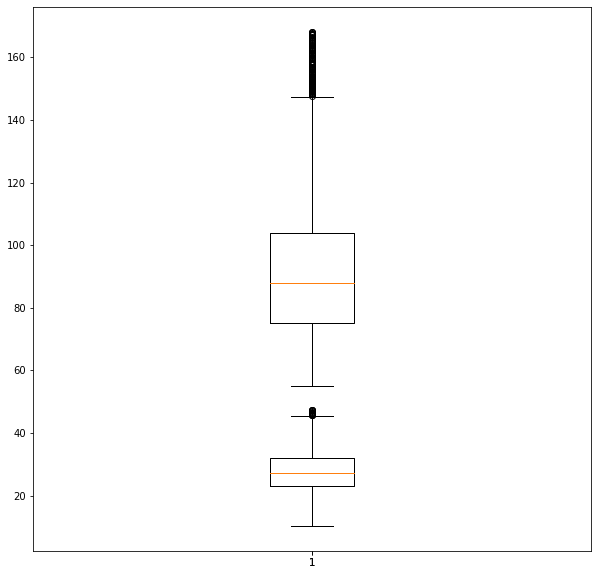

In [14]:
import matplotlib.pyplot as plt
data = stroke_data['avg_glucose_level']
data2 = stroke_data['bmi']
fig1 = plt.figure(figsize = (10,10))
fig2 = plt.figure(figsize = (10,10))
plt.boxplot(data)
plt.boxplot(data2)
plt.show()

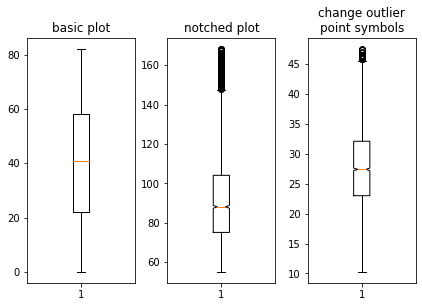

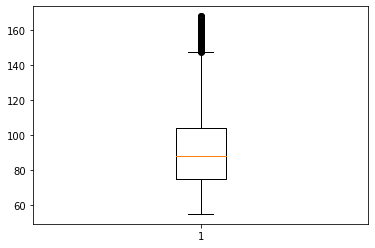

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axs = plt.subplots(1, 3)

# age plot
ageArray = stroke_data["age"]
axs[0].boxplot(ageArray)
axs[0].set_title('basic plot')

# avg_glucose_level plot
axs[1].boxplot(stroke_data["avg_glucose_level"], 1)
axs[1].set_title('notched plot')

# change outlier point symbols
axs[2].boxplot(stroke_data["bmi"], 2)
axs[2].set_title('change outlier\npoint symbols')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
#data = [data, d2, d2[::2]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

## Correlation matrix



In [16]:
# stroke_data_plot = px.data.stroke_data()
# fig = px.scatter_matrix
# (stroke_data, dimensions = ["age", "avg_glucose_level", "bmi"], color = "Stroke")
# fig.show()


fig = px.scatter_matrix(stroke_data,
    dimensions=["age", "avg_glucose_level", "bmi"],
    color="stroke")
fig.show()

The older you are, the more likely you are to have a stroke. The higher you average glucose level is, the higher the stroke risk becomes. The higher your BMI is, the more likely you ate to have a stroke

The most dangerous combination is a high glucose level, and old age

The only data point that does not have any direct relation to strokes is age, although it does raise the chance for a person to get a stroke, when they are older

